In [1]:
import os
import pandas as pd
import numpy as np
import re
import pickle
import seaborn as sn

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Гипотеза:  
___Экономика государств с развитой государственной поддержкой инновационных предприятий (инновационной системы) растёт интенсивнее.___

Для этого, выбираю следующие показатели:  

___1.1.	Political environment (интегральный покозатель)___  
1.1.1.	Political stability and absence of violence/terrorism  
1.1.2.	Government effectiveness  
1.1.3.	Press freedom  

___1.2.	Regulatory environment (интегральный покозатель)___  
1.2.1.	Regulatory quality  
1.2.2.	Rule of law  
1.2.3.	Cost of redundancy dismissal  

___1.3.	Business environment (интегральный покозатель)___  
1.3.1.	Ease of starting a business  
1.3.2.	Ease of resolving insolvency  
1.3.3.	Ease of paying taxes  

2.1.1.	Expenditure on education  
2.1.2.	Public expenditure on education per pupil  

2.1.5.	Pupil-teacher ratio, secondary  

2.2.1.	Tertiary enrolment  
2.2.2.	Graduates in science and engineering  

2.3.1.	Researchers  
2.3.2.	Gross expenditure on R&D (GERD)  

3.1.3.	Government's online service  

3.2.1.	Electricity output  
3.2.3.	Logistics performance  

3.3.2.	Environmental performance  


___4.1.	Credit (интегральный покозатель)___  
4.1.1.	Ease of getting credit  
4.1.2.	Domestic credit to private sector  
4.1.3.	Microfinance institutions' gross loan portfolio  

4.2.1.	Ease of protecting investors  

4.2.4.	Venture capital deals  

4.3.2.	Market access for non-agricultural exports  
4.3.3.	Intensity of local competition  

5.1.2.	Firms offering formal training  

___5.2.	Innovation linkages (интегральный покозатель)___   
5.2.1.	University/industry research collaboration  
5.2.2.	State of cluster development  
5.2.3.	GERD financed by abroad  
5.2.4.	Joint venture/strategic alliance deals  
5.2.5.	Patent families filed in at least three offices  

5.3.1.	Royalties and license fees payments (% of service imports)  
5.3.4.	Foreign direct investment net inflows  

6.1.2.	Patent Cooperation Treaty resident applications  

6.3.4.	Foreign direct investment net outflows

Я выбрал 37 показателей, которые могут характеризовать государственную поддержку и 5 интегральных позателей (вероятно они могут быть полезны для свёртки)

# Исследование датасета

Построить графики:  
1) индекс gii по годам и регионам - кластеризация  
2) индекс gii по годам  
3) интегральные признаки по регионам  

In [2]:
#загружаю датасет из файла
with open("C://Users//dserp//ML//Degree_ML//dataset_GW.pickle", 'rb') as f:
    dataset = pickle.load(f)
f.close()
dataset

{'2013':        2013                                          Indicator  Albania  \
 8    1.1.1.  Political stability and absence of violence/te...     83.0   
 9    1.1.2.                           Government effectiveness     81.0   
 10   1.1.3.                                      Press freedom     81.0   
 12   1.2.1.                                 Regulatory quality     64.0   
 13   1.2.2.                                        Rule of law     93.0   
 14   1.2.3.                       Cost of redundancy dismissal     97.0   
 16   1.3.1.                        Ease of starting a business     23.0   
 17   1.3.2.                       Ease of resolving insolvency     59.0   
 18   1.3.3.                               Ease of paying taxes    114.0   
 21   2.1.1.                           Expenditure on education      0.0   
 22   2.1.2.          Public expenditure on education per pupil     89.0   
 25   2.1.5.                     Pupil-teacher ratio, secondary     72.0   
 27 

In [3]:
dataset['GII'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2013 to region
Columns: 228 entries, Albania to Zimbabwe
dtypes: object(228)
memory usage: 14.3+ KB


## Индекс GII по годам и регионам

In [4]:
range_country = dataset['region']['region'].value_counts()
print(' Всего стран:',len(dataset['region'].index),  'В', len(range_country.index), 'регионах')

 Всего стран: 228 В 22 регионах


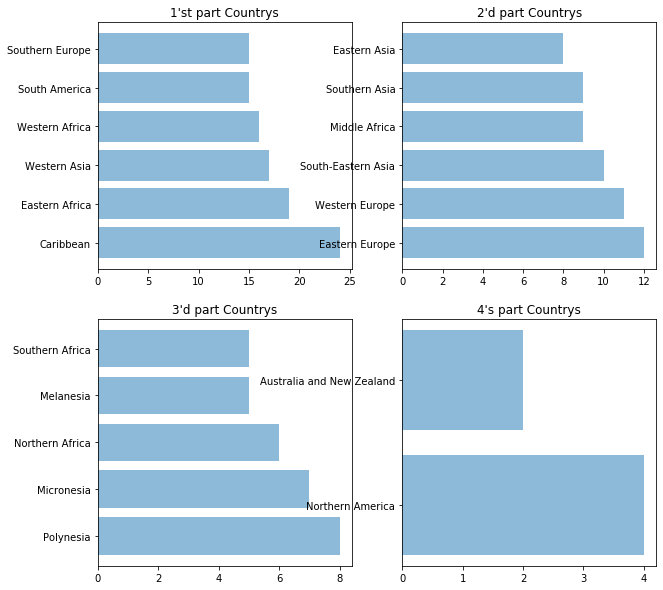

In [5]:
gridsize = (2, 2)
fig1, ax1 = plt.subplots(2,2, figsize=[10,10])
ax1 = ax1.flatten()

ax1[0] = plt.subplot2grid(gridsize, (0, 0))
ax1[0].barh(range_country.index[0:6], dataset['region']['region'].value_counts()[0:6], align='center', alpha=0.5)
ax1[0].set_title("1'st part Countrys")

ax1[1] = plt.subplot2grid(gridsize, (0, 1))
ax1[1].barh(range_country.index[7:13], dataset['region']['region'].value_counts()[7:13], align='center', alpha=0.5)
ax1[1].set_title("2'd part Countrys")

ax1[2] = plt.subplot2grid(gridsize, (1, 0))
ax1[2].barh(range_country.index[14:19], dataset['region']['region'].value_counts()[14:19], align='center', alpha=0.5)
ax1[2].set_title("3'd part Countrys")

ax1[3] = plt.subplot2grid(gridsize, (1, 1))
ax1[3].barh(range_country.index[20:22], dataset['region']['region'].value_counts()[20:22], align='center', alpha=0.5)
ax1[3].set_title("4's part Countrys")

plt.show()

In [6]:
reg_count = {}
reg_count = dataset['GII'].iloc[[7]].T['region'].value_counts()[:22]
reg_count

Caribbean                    24
Eastern Africa               19
Western Asia                 17
Western Africa               16
South America                15
Southern Europe              15
Northern Europe              13
Eastern Europe               12
Western Europe               11
South-Eastern Asia           10
Middle Africa                 9
Southern Asia                 9
Eastern Asia                  8
Central America               8
Polynesia                     8
Micronesia                    7
Northern Africa               6
Melanesia                     5
Southern Africa               5
Central Asia                  5
Northern America              4
Australia and New Zealand     2
Name: region, dtype: int64

In [7]:
#создаю датафраме с суммой gii по регионама и годам
ds_gii_sum = dataset['GII'].iloc[[0,7], :].T.groupby('region').sum().reset_index()
for i  in range(1,7):
    ds_gii_sum = ds_gii_sum.merge(dataset['GII'].iloc[[i,7], :].T.groupby('region').sum().reset_index(), how = 'left')
ds_gii_sum.fillna(0, inplace = True)
ds_gii_sum = ds_gii_sum.iloc[:22]
ds_gii_sum = ds_gii_sum.rename(index = ds_gii_sum['region'])
ds_gii_sum.drop('region', axis = 1, inplace = True)
ds_gii_sum.drop(2019, axis = 1, inplace = True)

#усреднение gii на 1 страну в реионе
for reg in ds_gii_sum.index:
    ds_gii_sum.loc[reg] /= reg_count[reg]
ds_gii_sum

,2013,2014,2015,2016,2017,2018
Australia and New Zealand,18.000000,17.500000,16.000000,18.000000,22.000000,21.000000
Caribbean,12.041667,12.333333,12.583333,12.097222,12.319444,12.736111
Central America,85.875000,89.500000,89.375000,86.750000,87.812500,89.312500
Central Asia,87.000000,91.200000,85.400000,78.333333,78.933333,79.333333
Eastern Africa,65.000000,71.105263,71.894737,65.333333,67.877193,67.256140
Eastern Asia,19.250000,16.500000,17.375000,15.125000,14.375000,13.625000
Eastern Europe,45.166667,43.500000,42.166667,42.583333,42.666667,41.583333
Melanesia,19.400000,19.000000,23.000000,20.466667,20.466667,20.466667
Micronesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Middle Africa,41.222222,40.000000,37.888889,39.888889,39.777778,39.111111


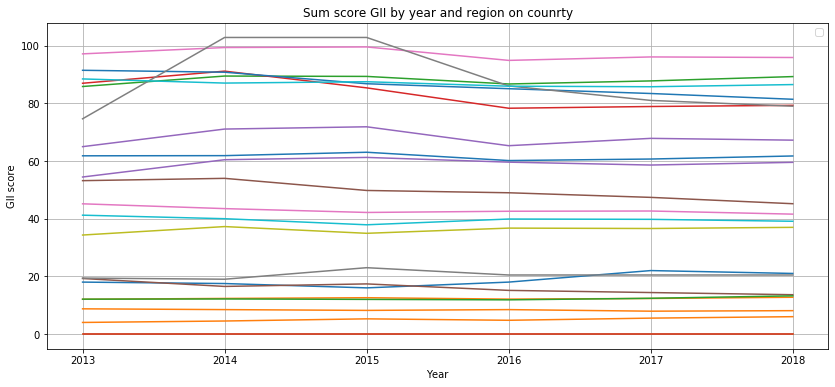

In [8]:
plt.figure(figsize = [14,6])
plt.title('Sum score GII by year and region on counrty')
plt.xlabel('Year')
plt.ylabel('GII score')
plt.grid(axis = 'both')
plt.legend(list(ds_gii_sum.index))
plt.plot(ds_gii_sum.T)

plt.figure(figsize = [10,8])
plt.title("GII sum by year")
plt.xlabel('Year')
plt.ylabel('GII score')
#plt.legend([list(ds_gii['region'])])
plt.plot(ds_gii.iloc[:,1:], '-')

plt.show()

## Построени матриц кореляций

In [9]:
#создание корреляционных матриц для фич по годам
corr_matrix_fe = {}
for i in list(dataset.keys())[:7]:
    corr_matrix_fe['_'.join(('corr', i))] = np.abs(dataset[i].corr())
corr_matrix_fe.keys()

dict_keys(['corr_2013', 'corr_2014', 'corr_2015', 'corr_2016', 'corr_2017', 'corr_2018', 'corr_2019'])

In [10]:
corr_matrix_fe['corr_2013']

,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela,VietNam,Yemen,Zambia,Zimbabwe
Albania,1.000000,0.478822,0.233855,0.098109,0.575891,0.211663,0.314407,0.450234,0.268392,0.045500,...,0.426429,0.358920,0.167054,0.278786,0.169948,0.018703,0.034841,0.019717,0.044501,0.019277
Algeria,0.478822,1.000000,0.488777,0.242650,0.447878,0.507378,0.000673,0.285441,0.049062,0.185740,...,0.111686,0.148907,0.065157,0.054540,0.335607,0.480892,0.259809,0.565929,0.178946,0.463706
Angola,0.233855,0.488777,1.000000,0.273860,0.141854,0.301983,0.015364,0.273806,0.192867,0.595679,...,0.146606,0.061523,0.131187,0.094856,0.347704,0.417155,0.361100,0.668233,0.110052,0.656049
Argentina,0.098109,0.242650,0.273860,1.000000,0.196047,0.129307,0.212568,0.014905,0.072758,0.129571,...,0.091546,0.053111,0.110600,0.563420,0.072781,0.663200,0.200379,0.275758,0.012484,0.303596
Armenia,0.575891,0.447878,0.141854,0.196047,1.000000,0.076110,0.408922,0.569952,0.043141,0.058007,...,0.093569,0.432710,0.154148,0.150488,0.061556,0.073893,0.072039,0.104113,0.046503,0.157995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.018703,0.480892,0.417155,0.663200,0.073893,0.153616,0.223753,0.121161,0.125733,0.314508,...,0.230587,0.121556,0.091851,0.229533,0.318095,1.000000,0.370797,0.595398,0.183713,0.629430
VietNam,0.034841,0.259809,0.361100,0.200379,0.072039,0.041886,0.341576,0.036091,0.242271,0.395262,...,0.535881,0.124754,0.162687,0.172412,0.615153,0.370797,1.000000,0.442377,0.090688,0.565380
Yemen,0.019717,0.565929,0.668233,0.275758,0.104113,0.255172,0.208714,0.215014,0.202353,0.517135,...,0.360223,0.052523,0.026094,0.113482,0.467106,0.595398,0.442377,1.000000,0.171392,0.684176
Zambia,0.044501,0.178946,0.110052,0.012484,0.046503,0.286328,0.150592,0.286377,0.428163,0.069473,...,0.068862,0.186047,0.411342,0.195549,0.029272,0.183713,0.090688,0.171392,1.000000,0.290283


plt.figure(figsize=(16,16))
sn.heatmap(corr_matrix_fe['corr_2013'], square = True, annot=True)
plt.show()

Text(0.5, 1.05, 'Correlation Matrix 2013')

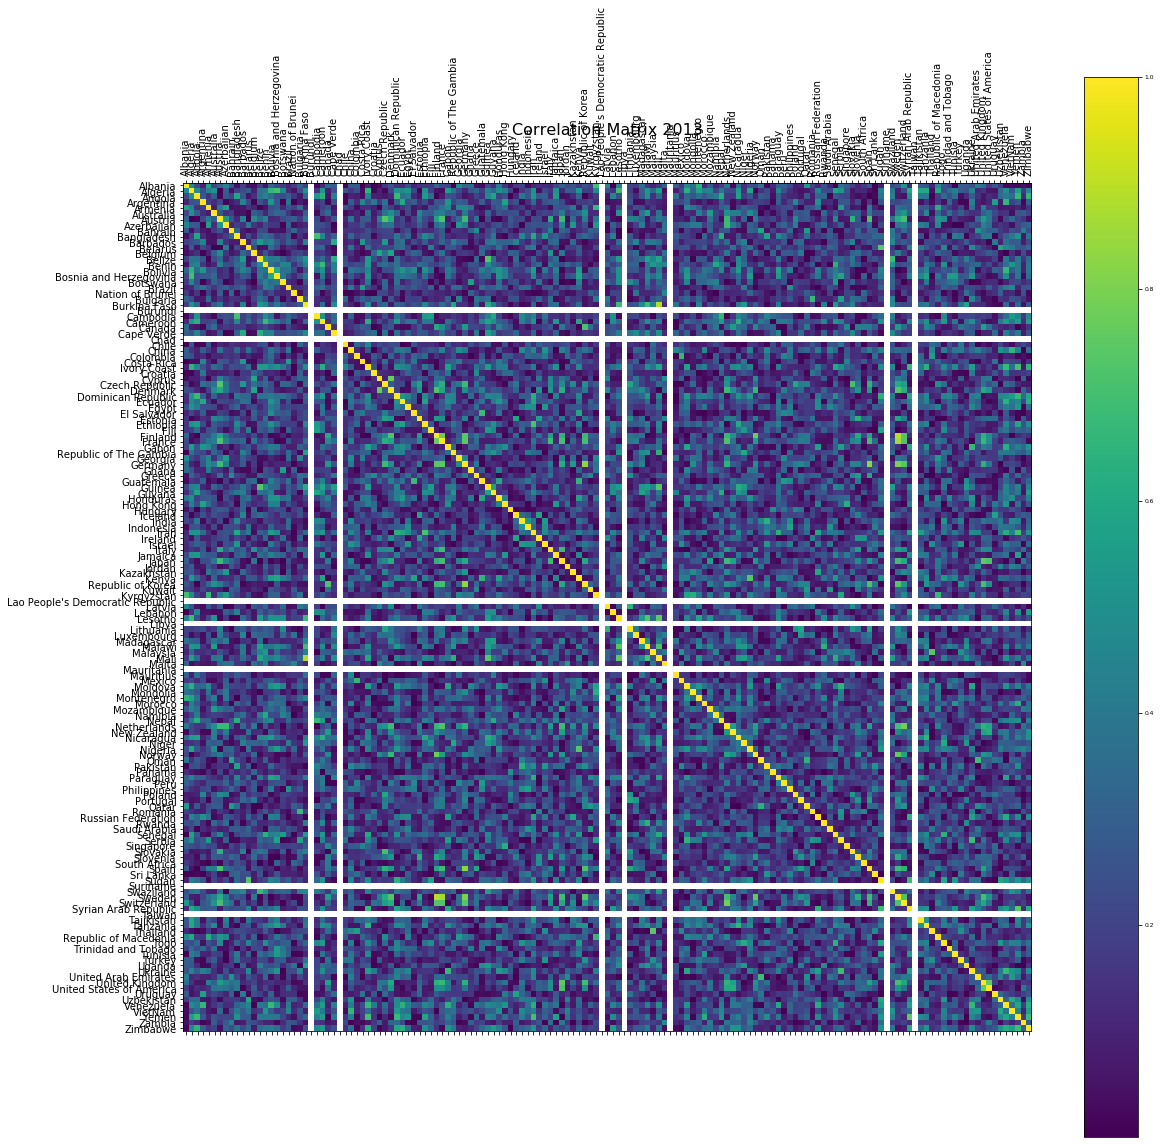

In [11]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2013'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2013'].shape[1]), corr_matrix_fe['corr_2013'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2013'].shape[1]), corr_matrix_fe['corr_2013'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=6)
plt.title('Correlation Matrix 2013', fontsize=16)

Text(0.5, 1.05, 'Correlation Matrix 2014')

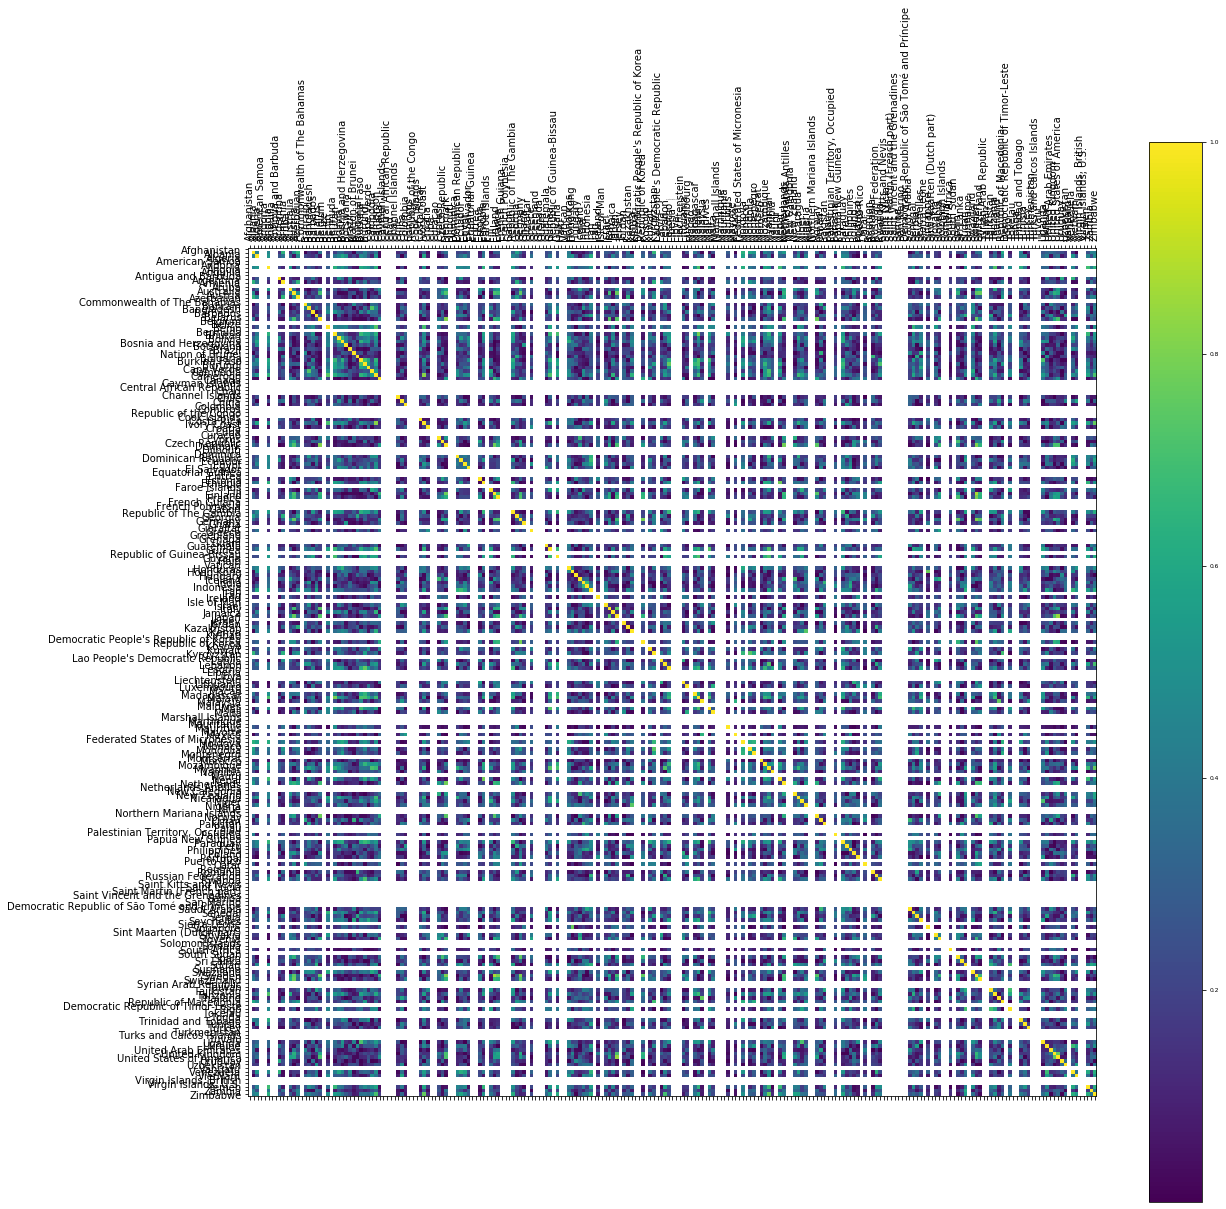

In [12]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2014'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2014'].shape[1]), corr_matrix_fe['corr_2014'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2014'].shape[1]), corr_matrix_fe['corr_2014'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=6)
plt.title('Correlation Matrix 2014', fontsize=0)

Text(0.5, 1.05, 'Correlation Matrix 2015')

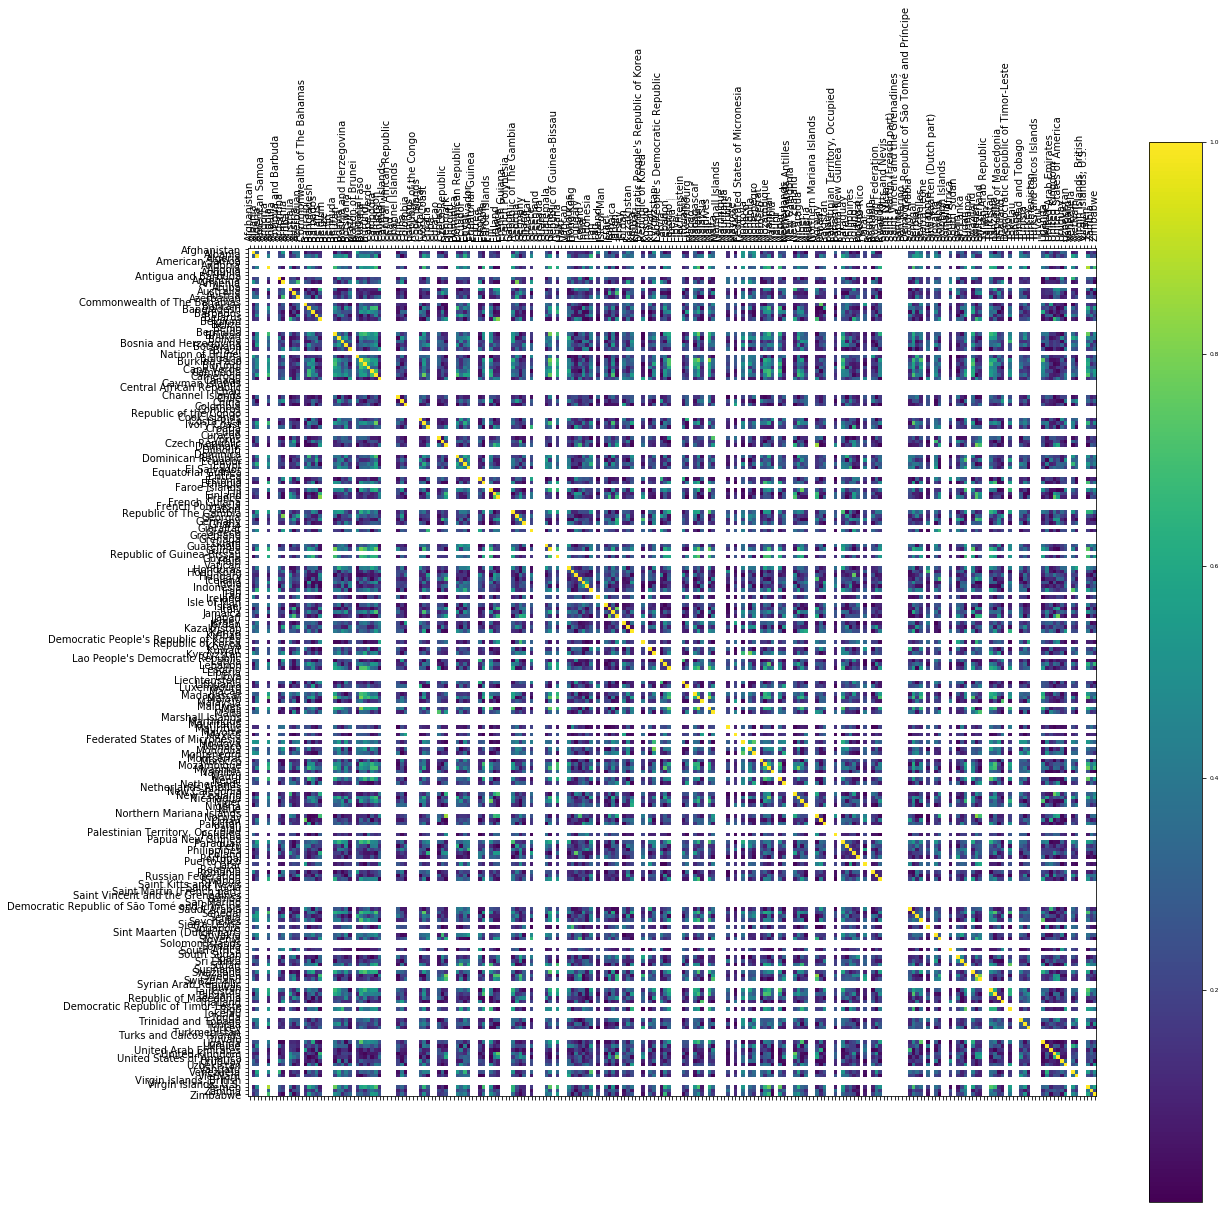

In [13]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2015'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2015'].shape[1]), corr_matrix_fe['corr_2015'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2015'].shape[1]), corr_matrix_fe['corr_2015'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=6)
plt.title('Correlation Matrix 2015', fontsize=0)

Text(0.5, 1.05, 'Correlation Matrix 2016')

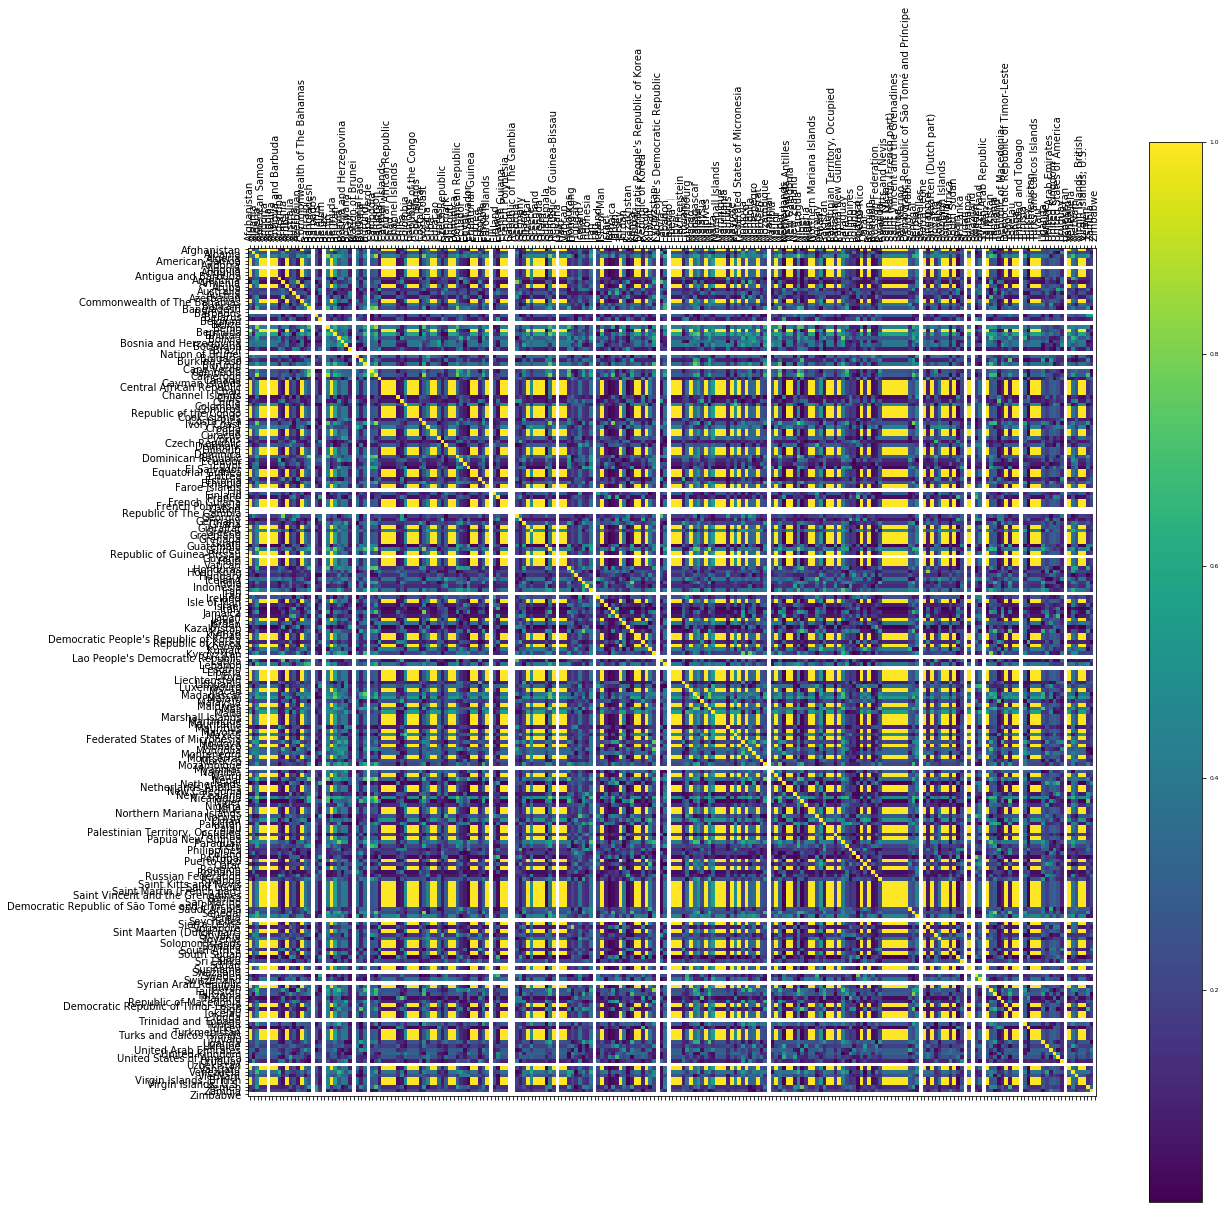

In [14]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2016'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2016'].shape[1]), corr_matrix_fe['corr_2016'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2016'].shape[1]), corr_matrix_fe['corr_2016'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=6)
plt.title('Correlation Matrix 2016', fontsize=0)

Text(0.5, 1.05, 'Correlation Matrix 2017')

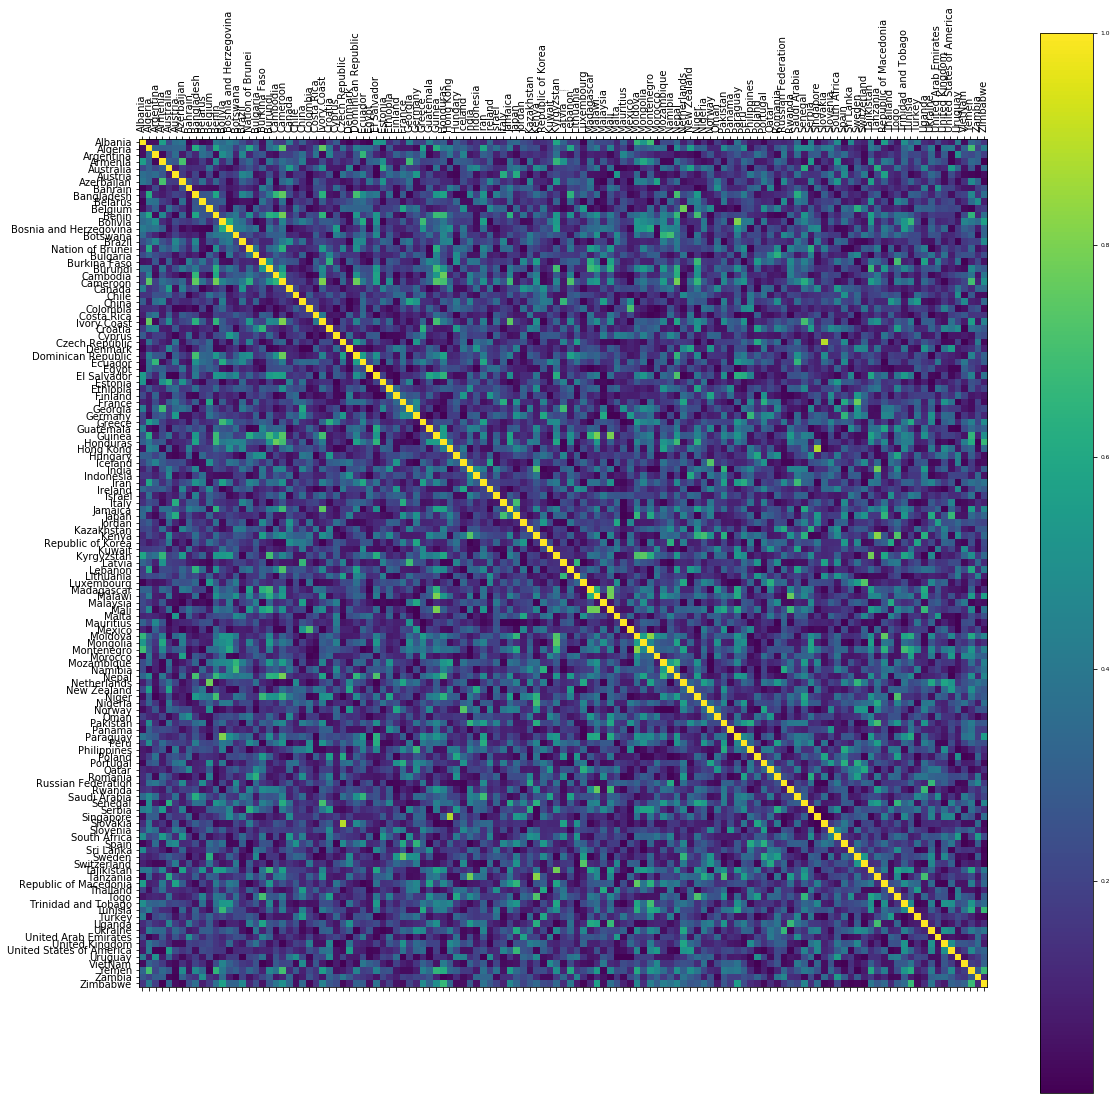

In [15]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2017'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2017'].shape[1]), corr_matrix_fe['corr_2017'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2017'].shape[1]), corr_matrix_fe['corr_2017'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=6)
plt.title('Correlation Matrix 2017', fontsize=0)

Text(0.5, 1.05, 'Correlation Matrix 2018')

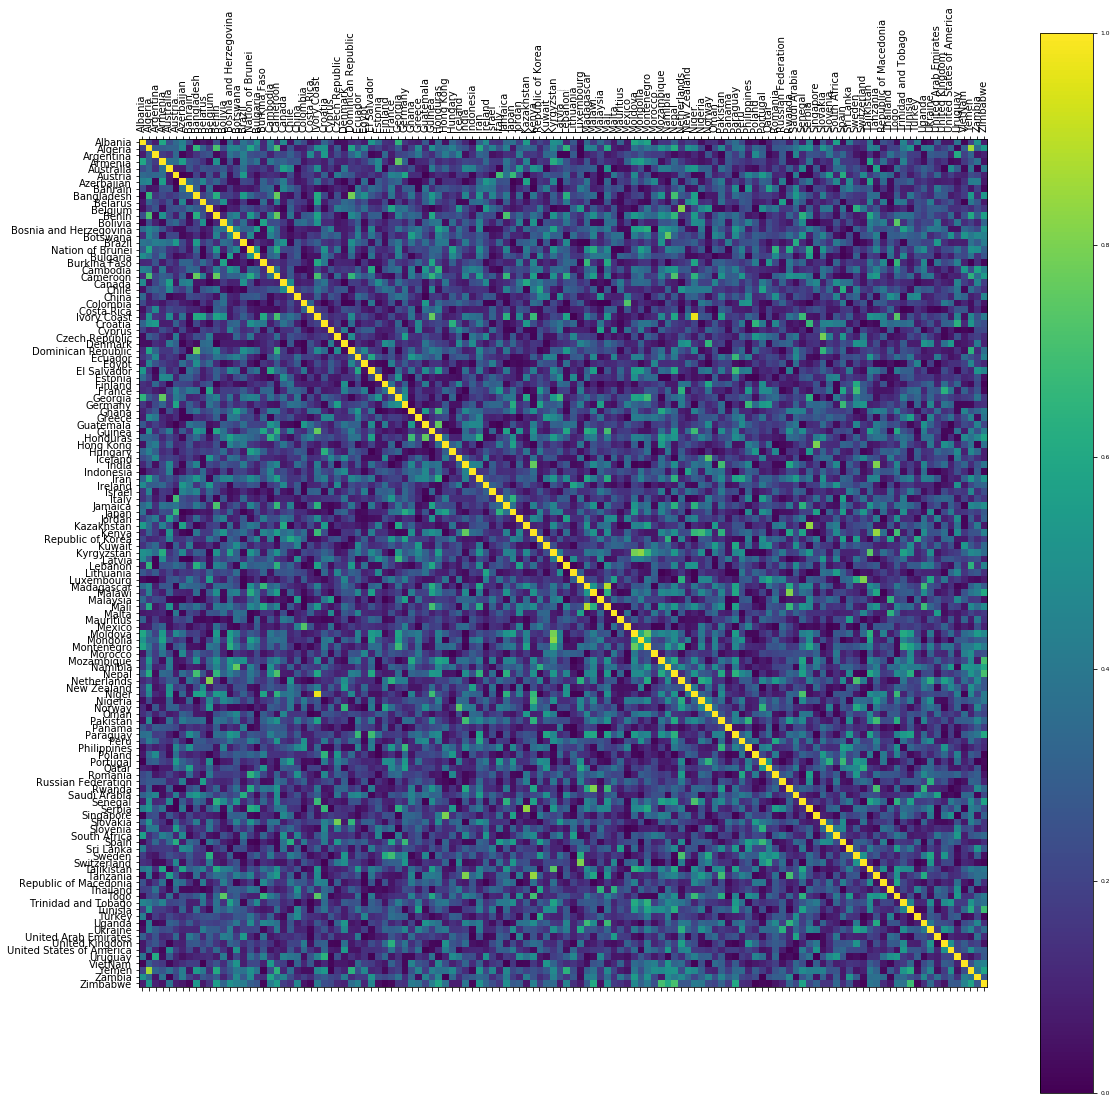

In [16]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2018'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2018'].shape[1]), corr_matrix_fe['corr_2018'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2018'].shape[1]), corr_matrix_fe['corr_2018'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=6)
plt.title('Correlation Matrix 2018', fontsize=0)

In [17]:
#поиск корреляционных матриц, где среднее значение столюца больше 0.5
for corr_m in corr_matrix_fe.keys():
    print(corr_m)
    for col in corr_matrix_fe[corr_m].columns:
        mean = corr_matrix_fe[corr_m][col].mean()
        if  mean > 0.5:
            print(mean)

corr_2013
corr_2014
corr_2015
corr_2016
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.5214764045219635
0.52147640